## Experimento: ajuste de distribuição de probabilidade

* Uso Modelo de Mistura de Gaussianas
* Parametrização via algoritmo Expectation-Maximization

## Importação das bibliotecas

In [3]:
import numpy as np                      #Função para operação matricial e etc.

import matplotlib.pyplot as plt         #Função para geração de gráficos
from matplotlib import cm               #Acesso à paletas de cores pré-definidas
import matplotlib.gridspec as gridspec  #Útil para oragnizar as figuras em subgráficos
from mpl_toolkits.mplot3d import Axes3D #Permite projeção 3d

import csv                              #Necessário na função implementada para leitura de dados

from sklearn import mixture             #Implementação do GMM via SKLearn

#Permite o uso do LaTeX nos gráficos a serem gerados
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Definição das funções utilizadas

In [4]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados (início do experimento)

In [5]:
path_data = 'saidaSim_I.txt'

#Não vamos usar o y... apenas os dados já simulados
y,x = read_class_data(path_data)

## Definição de variáveis e itens de 

In [6]:
k = 2 #Número de componentes
epsilon = 0.001 #Convergência
#m = x.shape[0]   #Número de observações
#dim = x.shape[1] #Dimensão do espaço de atributos

## Execução do método (GMM+EM)

In [7]:
#Instanciação do método
gmm = mixture.GaussianMixture(n_components=k, tol=epsilon, covariance_type='full', n_init=10, max_iter=100, init_params='kmeans', random_state=0)

#Ajsute do método
gmm.fit(x)

GaussianMixture(n_components=2, n_init=10, random_state=0)

## Adicional - apenas para visulaizar as regiões de decisão e a noção de acerto/erro

In [8]:
#Número de itens/atributo
N = 200 

#Definição espaço de atributos -- intervalo de valores em cada eixo (xmin~xmax) X (ymin ~ymax)
xmin = np.min(x[:,0]); xmax = np.max(x[:,0])
ymin = np.min(x[:,1]); ymax = np.max(x[:,1])

#Útil o experimento e para os gráficos a seguir
X1, X2 = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))

#Modelo GMM-EM
Z = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        padrao = [ [X1[i,j], X2[i,j]] ]
        Z[i,j] = np.exp( gmm.score( padrao ) )

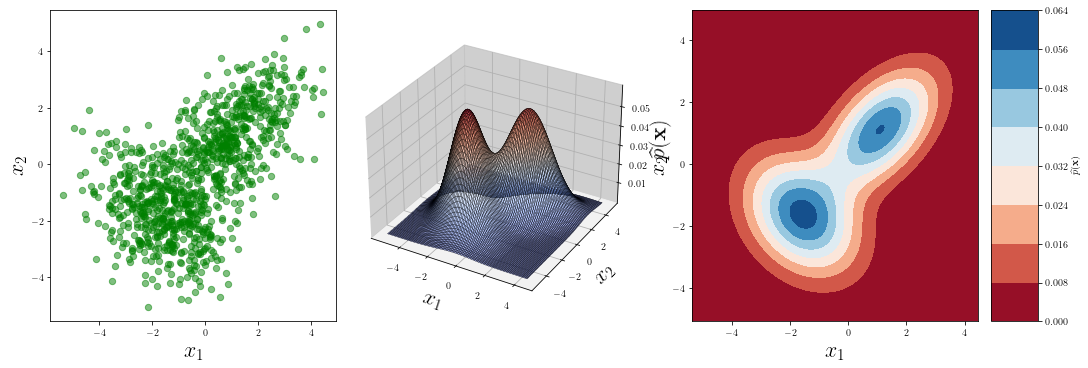

In [9]:
FS = (15,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(x[:,0],x[:,1], marker='o', color='green', s=40, alpha=0.5)
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)

# Subplot 2 ------------------------
ax2 = fig.add_subplot(spec[0, 1],projection='3d')
ax2.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.25, antialiased=True,cmap=cm.coolwarm, edgecolors='k',alpha=0.5)
ax2.w_xaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_yaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax2.set_xlabel('$x_1$', fontsize=22)
ax2.set_ylabel('$x_2$', fontsize=22)
ax2.set_zlabel(r'$\widehat{p}(\mathbf{x})$', fontsize=22)

# Subplot 3 ------------------------
ax3 = fig.add_subplot(spec[0, 2])
g1 = ax3.contourf(X1, X2, Z, cmap=cm.RdBu)
ax3.set_xlabel('$x_1$', fontsize=22)
ax3.set_ylabel('$x_2$', fontsize=22)
fig.colorbar(g1, orientation="vertical", label= r'$\widehat{p}(\mathbf{x})$')

plt.show()